# Hackathon : Reinforcement Learning for Drone Navigation

- Team name:
- Team members names:

## 0. Prerequisites

In [ ]:
%pip install -r requirements.txt

In [28]:
%load_ext autoreload
%autoreload 2

import env
import agent
import reward
import simulate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Training

In [37]:
trained_agent, all_rewards = simulate.train('./eval_configs/config_3.json')

Tentative de chargement du checkpoint: my_full_checkpoint.pth
Checkpoint chargé avec succès depuis my_full_checkpoint.pth !
Episode 1/400, total_reward=-29.999999999999925
Episode 2/400, total_reward=-29.999999999999925
Episode 3/400, total_reward=-29.999999999999925

Pygame window closed
Entraînement interrompu par l'utilisateur.
Entraînement terminé. Checkpoint final sauvegardé.


In [30]:
trained_agent, all_rewards = simulate.train('./config.json',  max_episodes_override=300, checkpoint_path="my_full_checkpoint.pth", save_interval=50)

Episode 1/300, total_reward=-9.99999999999998
Episode 2/300, total_reward=-9.99999999999998
Episode 3/300, total_reward=-9.99999999999998
Episode 4/300, total_reward=-9.99999999999998
Episode 5/300, total_reward=-9.99999999999998
Episode 6/300, total_reward=-9.99999999999998
Episode 7/300, total_reward=-9.99999999999998
Episode 8/300, total_reward=-9.99999999999998
Episode 9/300, total_reward=-9.99999999999998
Episode 10/300, total_reward=992.9
Episode 11/300, total_reward=-9.99999999999998
Episode 12/300, total_reward=-9.99999999999998
Episode 13/300, total_reward=992.2
Episode 14/300, total_reward=-9.99999999999998
Episode 15/300, total_reward=-9.99999999999998
Episode 16/300, total_reward=-9.99999999999998
Episode 17/300, total_reward=-9.99999999999998
Episode 18/300, total_reward=-9.99999999999998
Episode 19/300, total_reward=990.9
Episode 20/300, total_reward=996.6
Episode 21/300, total_reward=-9.99999999999998
Episode 22/300, total_reward=-9.99999999999998
Episode 23/300, total_r

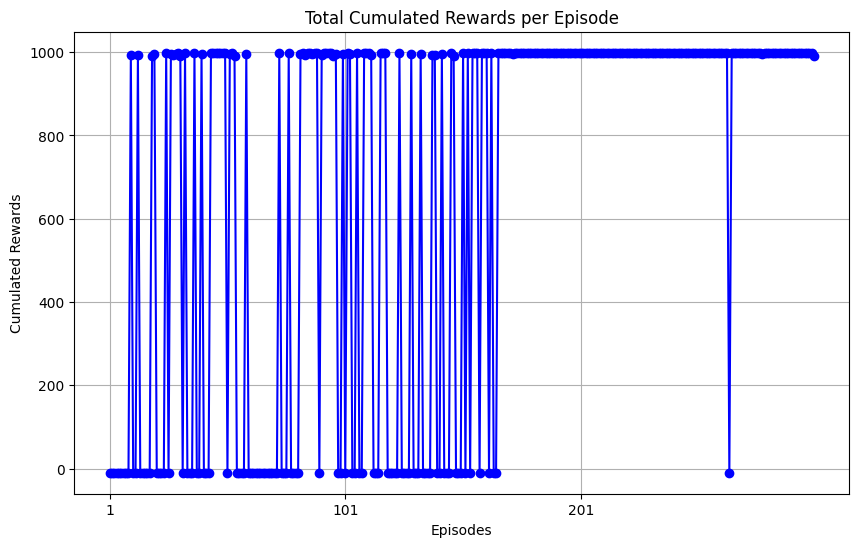

In [31]:
# Plot the cumulated rewards per episode
simulate.plot_cumulated_rewards(all_rewards)

## 2. Evaluation

In [32]:
eval_config_paths = [f"./eval_configs/config_{i}.json" for i in range(1, 11)]

In [33]:
all_results = simulate.evaluate(eval_config_paths, trained_agent)


--- Evaluating Configuration: ./eval_configs/config_1.json ---

--- Evaluating Configuration: ./eval_configs/config_2.json ---

--- Evaluating Configuration: ./eval_configs/config_3.json ---


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x26 and 16x256)

In [34]:
display(all_results)

NameError: name 'all_results' is not defined

In [ ]:
# Calculate averages for each configuration
averages = all_results.groupby('config_path').mean().reset_index().drop(columns=['episode'])
averages = averages.rename(columns={
    'steps': 'avg_steps',
    'reward': 'avg_reward',
    'evacuated': 'avg_evacuated',
    'deactivated': 'avg_deactivated'})

display(averages)
averages.to_csv('averages.csv', index=False)